<a href="https://colab.research.google.com/github/ipavlopoulos/paremia/blob/main/propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Propagation analysis of Greek proverbs

* Using a collection of proverbs from the [Hellenic Folklore Research Centre](http://www.kentrolaografias.gr/) of the Academy of Athens
* Using linguistic distance as a means to seek for possible routes the Greek proverbs may have travelled spatially.
---


In [ ]:
%%capture
!pip install python-Levenshtein
import pandas as pd
from Levenshtein import distance as lev
import numpy as np
import seaborn as sns
import networkx as nx
import ast
import random

In [ ]:
proverbs = pd.read_csv("data/proverbs.csv", index_col=0)
proverbs.place = proverbs.place.str.replace('\s*,\s*', '>', regex=True)
proverbs

,text,place,uri,collector
0,Απο Μαρθιού και Σεπτεβριού ίσα τα μερονύχτια,Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/278955,"Αικατερινίδης, Γεώργιος Ν."
1,"Απου πνιγεί και σκοτωθή, κακού θανατου πάει",Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/260188,"Αικατερινίδης, Γεώργιος Ν."
2,Αυτός δεν ξέρει να ρετσινώνη το δοξάρι,Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/290466,"Αικατερινίδης, Γεώργιος Ν."
3,Η καλή δουλειά άργιο έχει κ' η κακή περγέλιο έχει,Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/213730,"Αικατερινίδης, Γεώργιος Ν."
4,Κάθε μία κατσούνα σύρνει ομπρός τζη,Κρήτη>Λασίθι>Τουρτούλοι,http://hdl.handle.net/20.500.11853/183525,"Αικατερινίδης, Γεώργιος Ν."
...,...,...,...,...
134488,Απ' ούλα τα φαΓια το ρύζ' και τσόχα να φορής,Θράκη>Σαμακόβι,http://hdl.handle.net/20.500.11853/245653,anonymous
134489,Απ' τ' Άη – Λιός και μπρός γυρίζει ο καιρός αλ...,Μεσσηνία>Φιλιατρά,http://hdl.handle.net/20.500.11853/160335,anonymous
134490,Απ' τ' Άι – Ηλιά το βράδυ βάζει η ελιά το λάδι,Σίφνος,http://hdl.handle.net/20.500.11853/190853,anonymous
134491,Απ' τ' άλουγου στου γουμάρι,Ήπειρος,http://hdl.handle.net/20.500.11853/159862,anonymous


In [ ]:
# the duplicates, geolocated in this study
duplicates = pd.read_csv('data/duplicates_geolocated.csv')
duplicates['place'] = duplicates['place'].apply(ast.literal_eval)
duplicates['area'] = duplicates['area'].apply(ast.literal_eval)
duplicates

,text,place,place_num,area,area_num,latlon
0,(Ε)πήρε βάγια,"{Λακωνία, Ήπειρος}",2,"{Λακωνία, Ήπειρος}",2,"[(37.9574332, 23.7108518), (36.76027945, 22.79..."
1,"Άβολος ο νους, διπλός ο κόπος","{Νίσυρος, Μικρά Ασία>Τσεσμές (Κρήνη)}",2,"{Μικρά Ασία, Νίσυρος}",2,"[(36.58904575, 27.16918402255752), (38.1846366..."
2,Άβουλος νους διπλός κόπος,"{Θράκη>Αίνος, Θήρα (Σαντορίνη)}",2,"{Θήρα (Σαντορίνη), Θράκη}",2,"[(40.8464241, 25.8759377), (36.4044251, 25.395..."
3,"Άβουλος νους, διπλός ο κόπος","{Ρόδος, Κρήτη, Αμοργός}",3,"{Ρόδος, Κρήτη, Αμοργός}",3,"[(36.85252415, 25.89848696771565), (35.3084952..."
4,Άβουλος ο νους διπλός ο κόπος,"{Ρόδος, Σάμος>Μαραθόκαμπος, Θράκη, Θράκη>Μάδυτ...",5,"{Ρόδος, Ήπειρος, Σάμος, Θράκη}",4,"[(40.8464241, 25.8759377), (37.9574332, 23.710..."
...,...,...,...,...,...,...
3199,"ο παθός, μαθός","{Αργολίδα>Σχοινοχώρι, Λέρος}",2,"{Λέρος, Αργολίδα}",2,"[(37.56626615, 22.85593894780862), (37.1494507..."
3200,πονάει το δόντι,"{Θεσσαλία>Τρίκαλα, Φωκίδα}",2,"{Φωκίδα, Θεσσαλία}",2,"[(38.4998681, 22.24878032919352), (39.5594194,..."
3201,"που Πάτρα, που Φλομίτσι!","{Μάνη>Αβία, Μεσσηνία>Αβία>Κάμπος}",2,"{Μάνη, Μεσσηνία}",2,"[(36.986899050000005, 21.82712495001949), (41...."
3202,τού έδειξε τα δόντια,"{Αρκαδία>Τεγέα, Εύβοια}",2,"{Αρκαδία, Εύβοια}",2,"[(38.0368583, 23.6689264), (38.49417235, 23.91..."


In [ ]:
geolocs = pd.read_csv("data/geolocs.csv")
geolocs

,Κρήτη,Σίφνος,Σέρρες,Πήλιο,Ήπειρος,Λευκάδα,Αχαΐα,Εύβοια,Μακεδονία,Κύπρος,...,Ανατολική Θράκη,Αδριανούπολη,Φθιώτιδα,Ανδρίτσαινα Ολυμπίου,Δαρδανέλλια (Ελλήσποντος),Στερεά Ελλάδα,Αερόπολη,Τριφυλία,Φωκίδα,Δυτική Μάνη
0,35.308495,36.971401,41.091071,39.365088,37.957433,38.706573,38.069275,38.494172,40.686029,34.982302,...,41.675933,41.675933,38.88734,37.483836,40.337606,38.562460,36.665918,37.195013,38.499868,22.581762
1,24.463342,24.708110,23.549803,23.135561,23.710852,20.641709,21.872730,23.911084,23.693390,33.145128,...,26.558722,26.558722,22.36803,21.905533,26.640821,23.161853,22.381635,21.703732,22.248780,88.399181


In [ ]:
# basic processing
proverbs = proverbs[proverbs.collector != "anonymous"]
geolocs.index=["lat", "lon"]
geolocs = geolocs.to_dict()
print(len(geolocs))
geolocs

130


{'Κρήτη': {'lat': 35.3084952, 'lon': 24.46334231842296},
 'Σίφνος': {'lat': 36.9714014, 'lon': 24.70811041776585},
 'Σέρρες': {'lat': 41.0910711, 'lon': 23.5498031},
 'Πήλιο': {'lat': 39.3650875, 'lon': 23.1355607},
 'Ήπειρος': {'lat': 37.9574332, 'lon': 23.7108518},
 'Λευκάδα': {'lat': 38.7065734, 'lon': 20.641708855541477},
 'Αχαΐα': {'lat': 38.0692748, 'lon': 21.87273042232539},
 'Εύβοια': {'lat': 38.49417235, 'lon': 23.91108439913793},
 'Μακεδονία': {'lat': 40.6860291, 'lon': 23.6933899},
 'Κύπρος': {'lat': 34.9823018, 'lon': 33.1451285},
 'Πέλλα': {'lat': 40.7541229, 'lon': 22.517832973183303},
 'Λέσβος': {'lat': 39.17584185, 'lon': 25.99891345023241},
 'Θράκη': {'lat': 40.8464241, 'lon': 25.8759377},
 'Ρούμελη': {'lat': 35.4049682, 'lon': 24.7001033},
 'Κοζάνη': {'lat': 40.3007259, 'lon': 21.7883119},
 'Σάμος': {'lat': 37.72461615, 'lon': 26.81929189110984},
 'Αρκαδία': {'lat': 38.0368583, 'lon': 23.6689264},
 'Ίμβρος': {'lat': 35.2541539, 'lon': 24.1704124},
 'Σκύρος': {'lat': 3

In [ ]:
# adding lat/lon/area information
proverbs['area'] = proverbs.place.map(lambda x: x.split(">")[0])
proverbs['lat'] = proverbs.area.map(lambda x: geolocs[x]["lat"] if x in geolocs else None)
proverbs['lon'] = proverbs.area.map(lambda x: geolocs[x]["lon"] if x in geolocs else None)
proverbs = proverbs[proverbs.lon.notna() & proverbs.lat.notna()]
proverbs

,text,place,uri,collector,area,lat,lon
0,Απο Μαρθιού και Σεπτεβριού ίσα τα μερονύχτια,Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/278955,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
1,"Απου πνιγεί και σκοτωθή, κακού θανατου πάει",Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/260188,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
2,Αυτός δεν ξέρει να ρετσινώνη το δοξάρι,Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/290466,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
3,Η καλή δουλειά άργιο έχει κ' η κακή περγέλιο έχει,Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/213730,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
4,Κάθε μία κατσούνα σύρνει ομπρός τζη,Κρήτη>Λασίθι>Τουρτούλοι,http://hdl.handle.net/20.500.11853/183525,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
...,...,...,...,...,...,...,...
119488,Φκιάντσ' κατ' δ'λειές ούτι τα σ'κκλιά δε τ'ς τρων,Ημαθία>Βέροια,http://hdl.handle.net/20.500.11853/255865,"Ψωμά, Ελένη",Ημαθία,40.517038,22.180720
119489,Χαμπ'λα – χαμπ'λά τα μάτια κι σφούγγα τα κουμμ...,Ημαθία>Βέροια,http://hdl.handle.net/20.500.11853/279241,"Ψωμά, Ελένη",Ημαθία,40.517038,22.180720
119490,Χουρίς υτία κι' αφουρμή χάρους ψυχή δεν παίρνει,Ημαθία>Βέροια,http://hdl.handle.net/20.500.11853/159500,"Ψωμά, Ελένη",Ημαθία,40.517038,22.180720
119491,Ψώραβ' γίδα τ' νουρά σκαπάν',Ημαθία>Βέροια,http://hdl.handle.net/20.500.11853/201724,"Ψωμά, Ελένη",Ημαθία,40.517038,22.180720


* Remove duplicates on `text` and `area`.

In [ ]:
proverbs = proverbs[~proverbs.duplicated(subset=['text', 'area'], keep='first')]
proverbs

,text,place,uri,collector,area,lat,lon
0,Απο Μαρθιού και Σεπτεβριού ίσα τα μερονύχτια,Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/278955,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
1,"Απου πνιγεί και σκοτωθή, κακού θανατου πάει",Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/260188,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
2,Αυτός δεν ξέρει να ρετσινώνη το δοξάρι,Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/290466,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
3,Η καλή δουλειά άργιο έχει κ' η κακή περγέλιο έχει,Κρήτη>Λασίθι>Κεντρί,http://hdl.handle.net/20.500.11853/213730,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
4,Κάθε μία κατσούνα σύρνει ομπρός τζη,Κρήτη>Λασίθι>Τουρτούλοι,http://hdl.handle.net/20.500.11853/183525,"Αικατερινίδης, Γεώργιος Ν.",Κρήτη,35.308495,24.463342
...,...,...,...,...,...,...,...
119487,Φεύγα λέρα 'π τόν γιακά,Ημαθία>Βέροια,http://hdl.handle.net/20.500.11853/276640,"Ψωμά, Ελένη",Ημαθία,40.517038,22.180720
119488,Φκιάντσ' κατ' δ'λειές ούτι τα σ'κκλιά δε τ'ς τρων,Ημαθία>Βέροια,http://hdl.handle.net/20.500.11853/255865,"Ψωμά, Ελένη",Ημαθία,40.517038,22.180720
119489,Χαμπ'λα – χαμπ'λά τα μάτια κι σφούγγα τα κουμμ...,Ημαθία>Βέροια,http://hdl.handle.net/20.500.11853/279241,"Ψωμά, Ελένη",Ημαθία,40.517038,22.180720
119490,Χουρίς υτία κι' αφουρμή χάρους ψυχή δεν παίρνει,Ημαθία>Βέροια,http://hdl.handle.net/20.500.11853/159500,"Ψωμά, Ελένη",Ημαθία,40.517038,22.180720


## Proverb spatial propagation

* Besides (text-) duplicates, near-duplicates also exist, probably due to the spatial propagation of proverbs over time.

* In what follows, we call these near-duplicates *close relatives*.

* Using linguistic distance, we can estimate the route of a proverb, assuming that shorter travels lead to fewer edits.

In [ ]:
highly_distr = duplicates.sort_values(by='area_num', ascending=False).head(3).reset_index(drop=True)
highly_distr

,text,place,place_num,area,area_num,latlon
0,Η γλώσσα κόκκαλα δεν έχει και κόκκαλα τσακίζει,"{Κρήτη>Σητεία, Κύπρος>Λευκόνοικο, Αρκαδία>Δημη...",45,"{Μικρά Ασία, Νάξος, Θεσπρωτία, Κρήτη, Δαρδανέλ...",23,"[(40.51703795, 22.18071972652394), (39.6327644..."
1,Στου κουφού την πόρτα όσο θέλεις βρόντα,"{Σέρρες, Καστοριά>Απόσκεπος, Αρκαδία>Γορτυνία,...",26,"{Σέρρες, Πρέβεζα, Νάξος, Θεσπρωτία, Κρήτη, Ικα...",20,"[(39.6327644, 22.3965233), (38.4998681, 22.248..."
2,"Ανεμομαζώματα, διαβολοσκορπίσματα","{Αδριανούπολη, Θράκη>Σηλυβρία, Τήλος, Μακεδονί...",28,"{Μακεδονία, Αδριανούπολη, Αργολίδα, Αμοργός, Α...",18,"[(36.85252415, 25.89848696771565), (40.3376058..."


* First we'll need a function that finds close relatives of a text among a set of candidate texts and their respective regions.

* By default we consider close relatives those with a Lenevshtein distance less than or equal to five.

In [ ]:
def find_close_relatives(text, candidate_texts, candidate_areas, max_distance=5):
    candidates = pd.DataFrame({'text':candidate_texts, 'area': candidate_areas})
    candidates['lev'] = candidates['text'].map(lambda x: lev(x, text))
    close_relatives = candidates[(candidates.lev <= max_distance) & (candidates.lev > 0)]
    close_relatives = close_relatives.sort_values("lev", ascending=False)
    return close_relatives

* We'll also need a helper function that checks whether a list has no two consecutive duplicates.

* This will be used to ensure that we do not move from an area to the same area.

In [ ]:
highly_distr.iloc[0].area

{'Ήπειρος',
 'Ανατολική Θράκη',
 'Αργολίδα',
 'Αρκαδία',
 'Αχαΐα',
 'Δαρδανέλλια (Ελλήσποντος)',
 'Εύβοια',
 'Ημαθία',
 'Θεσπρωτία',
 'Θράκη',
 'Ικαρία',
 'Ιωάννινα',
 'Καστοριά',
 'Κοζάνη',
 'Κρήτη',
 'Κύπρος',
 'Μάνη',
 'Μικρά Ασία',
 'Νάξος',
 'Νίσυρος',
 'Πήλιο',
 'Ρούμελη',
 'Φιλιππούπολη'}

In [ ]:
def has_no_consecutive_duplicates(lst):
    for a, b in zip(lst, lst[1:]):
        if a == b:
            return False
    return True

In [ ]:
def find_indirect_paths_nd(near_duplicates, verbose=0):

    # The direct distance between two near duplicates is their Levenshtein distance.
    n = len(near_duplicates)
    direct_dist_matrix = np.zeros((n, n), dtype=int)
    for u in range(n):
        for v in range(n):
            if u != v:
                direct_dist_matrix[u, v] = lev(near_duplicates.iloc[u]['text'],
                                               near_duplicates.iloc[v]['text'])

    # Now calculate shortest paths, not necessarily direct.
    # We create a graph, with nodes being the variants and the connection weights being
    # the Levenshtein distance between two near duplicates.
    G = nx.from_numpy_array(direct_dist_matrix,
                            parallel_edges=False,
                            create_using=nx.Graph)

    # We'll collect all the indirect shortest paths.
    indirect_shortest_paths = {}
    for u in range(n):
        for v in range(n):
            if u == v:
                continue
            u_v_shortest_paths = nx.all_shortest_paths(G, u, v, weight='weight')
            for path in u_v_shortest_paths:
                # Collect indirect shortest paths.
                if len(path) > 2:
                    if u not in indirect_shortest_paths:
                        indirect_shortest_paths[u] = {}
                    if v not in indirect_shortest_paths[u]:
                        indirect_shortest_paths[u][v] = []
                    indirect_shortest_paths[u][v].append(path)

    out = []
    for u, v_paths in indirect_shortest_paths.items():
        for v, paths in v_paths.items():
            # In area_paths we gather the areas through which the proverb has travelled.
            area_paths = [
                [near_duplicates['area'].iloc[node] for node in path]
                for path in paths
            ]
            # In proverb_paths we gather the text versions of the travelling proverb.
            proverb_paths = [
                [near_duplicates['text'].iloc[node] for node in path]
                for path in paths
            ]
            if verbose > 0:
                print(f'shortest indirect paths {u}->{v}:')
                print(f'{paths}: {area_paths}')
            non_trivial_paths = []
            non_trivial_area_paths = []
            non_trival_proverb_paths = []
            for (p, ap, pp) in zip(paths, area_paths, proverb_paths):
                if has_no_consecutive_duplicates(ap) and ap[0] != ap[-1]:
                    non_trivial_paths.append(p)
                    non_trivial_area_paths.append(ap)
                    non_trival_proverb_paths.append(pp)
            if verbose > 0:
                print('shortest non trivial paths')
            if len(non_trivial_area_paths) > 0:
                out.extend(zip(non_trivial_area_paths, non_trival_proverb_paths))
                if verbose > 0:
                    print(non_trivial_paths)
                    print(non_trivial_area_paths)
                    print(non_trival_proverb_paths)
                    print('---')
            else:
                if verbose > 0:
                    print('None')
    return out

In [ ]:
# Use case: ''The tongue doesn't have bones, yet bones it crashes''

target = highly_distr.iloc[0].text
print(target)

def find_indirect_paths_text(text, max_distance=5, verbose=0):
    source_areas = highly_distr[highly_distr['text'] == text].area.array[0]
    print('source areas:', source_areas)
    crels = find_close_relatives(text,
                                 proverbs.text,
                                 proverbs.area,
                                 max_distance)
    print('crels', crels)
    print('number of crels', crels.shape[0])
    crels_areas = set(crels.area.unique())
    print('crels_areas:', crels_areas)

    return find_indirect_paths_nd(crels, verbose), crels

indirect_paths, crels = find_indirect_paths_text(target, verbose=0)

Η γλώσσα κόκκαλα δεν έχει και κόκκαλα τσακίζει
source areas: {'Μικρά Ασία', 'Νάξος', 'Θεσπρωτία', 'Κρήτη', 'Δαρδανέλλια (Ελλήσποντος)', 'Αργολίδα', 'Ικαρία', 'Νίσυρος', 'Αρκαδία', 'Καστοριά', 'Εύβοια', 'Μάνη', 'Ήπειρος', 'Κοζάνη', 'Ιωάννινα', 'Κύπρος', 'Πήλιο', 'Αχαΐα', 'Φιλιππούπολη', 'Ρούμελη', 'Θράκη', 'Ανατολική Θράκη', 'Ημαθία'}
crels                                                     text             area  lev
1830         Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'           Ίμβρος    5
42718      Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάννει            Θράκη    5
111481       Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'           Σέρρες    5
108563  Η γλώσσα κόκκαλα δεν έσιει τσιε κόκκαλα τσακίζει           Κύπρος    5
97034        Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάει  Αιτωλοακαρνανία    5
81021        Η γλώσσα κόκκαλα δεν έχι τσι κόκκαλα τσακίζ       Μικρά Ασία    5
44968        Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'          Ήπειρος    5
119383       Η γλώσσα κόκκ

In [ ]:
crels

,text,area,lev
1830,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Ίμβρος,5
42718,Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάννει,Θράκη,5
111481,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Σέρρες,5
108563,Η γλώσσα κόκκαλα δεν έσιει τσιε κόκκαλα τσακίζει,Κύπρος,5
97034,Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάει,Αιτωλοακαρνανία,5
81021,Η γλώσσα κόκκαλα δεν έχι τσι κόκκαλα τσακίζ,Μικρά Ασία,5
44968,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Ήπειρος,5
119383,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Ημαθία,5
10094,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Εύβοια,5
13669,Η γλώσσα κόκκαλα εν έσει τζαι κόκκαλα τσακκίζει,Κύπρος,5


In [ ]:
indirect_paths

[(['Ίμβρος', 'Μακεδονία', 'Θράκη'],
  ["Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'",
   "Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζει",
   'Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάννει']),
 (['Ίμβρος', 'Θράκη', 'Μακεδονία', 'Θράκη'],
  ["Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'",
   "Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζ'",
   "Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζει",
   'Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάννει']),
 (['Ίμβρος', 'Ρούμελη', 'Θράκη'],
  ["Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'",
   'Η γλώσσα κόκκαλα δεν έχει κι κόκκαλα τσακίζει',
   'Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάννει']),
 (['Ίμβρος', 'Θράκη', 'Σέρρες'],
  ["Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'",
   "Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζ'",
   "Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'"]),
 (['Ίμβρος', 'Ρούμελη', 'Κύπρος'],
  ["Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'",
   'Η γλώσσα κόκκαλα δεν έχει κι κόκκαλα τσακίζει',
   'Η γλώσσα κόκκαλα δεν έσιει τσιε κόκκαλα

In [47]:
cyprus_indirect_paths = [ ip for ip in indirect_paths if len(ip[0]) == 3 and 'Ήπειρος' in ip[0] ]
cyprus_indirect_paths

[(['Ίμβρος', 'Θράκη', 'Ήπειρος'],
  ["Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'",
   "Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζ'",
   "Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'"]),
 (['Θράκη', 'Ρούμελη', 'Ήπειρος'],
  ['Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάννει',
   'Η γλώσσα κόκκαλα δεν έχει κι κόκκαλα τσακίζει',
   "Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'"]),
 (['Θράκη', 'Μακεδονία', 'Ήπειρος'],
  ['Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάννει',
   "Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζει",
   "Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'"]),
 (['Σέρρες', 'Θράκη', 'Ήπειρος'],
  ["Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'",
   "Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζ'",
   "Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'"]),
 (['Κύπρος', 'Ρούμελη', 'Ήπειρος'],
  ['Η γλώσσα κόκκαλα δεν έσιει τσιε κόκκαλα τσακίζει',
   'Η γλώσσα κόκκαλα δεν έχει κι κόκκαλα τσακίζει',
   "Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'"]),
 (['Αιτωλοακαρνανία', 'Θράκη', 'Ήπειρος'],
  ['

In [ ]:
# ''Knocking on a deaf man's door''

target = highly_distr.reset_index().iloc[1].text
print(target)

indirect_paths = find_indirect_paths_text(target)
print(len(indirect_paths))
indirect_paths[:10]

Στου κουφού την πόρτα όσο θέλεις βρόντα
source areas: {'Σέρρες', 'Πρέβεζα', 'Νάξος', 'Θεσπρωτία', 'Κρήτη', 'Ικαρία', 'Άνδρος', 'Νίσυρος', 'Αρκαδία', 'Καστοριά', 'Λακωνία', 'Κοζάνη', 'Πέλλα', 'Ιωάννινα', 'Φιλιππούπολη', 'Φωκίδα', 'Ρούμελη', 'Θράκη', 'Ανατολική Θράκη', 'Κεφαλληνία'}
crels                                                text  \
28391         Στου κουφού τη μπόρτα όσο θελς βρόντα   
67809         Στου κουφού την bόρτα όσο θέλ'ς βρόdα   
26237        Στου κουφού την πόρτα όσο θέλεις χτύπα   
68433       Τού κουφού την πόρτα, όσο θέλεις βρόντα   
76273   Σ του κουφού την πόρταν, όσον θέλεις βρόντα   
45769         Στου κουφού τη bόρτα όσο θέλεις βρόdα   
67811      Στου κουφού την πόρτα, όσο θέλης βρόντα!   
51929       Στου κουφού τημ πόρτα όσο θέλης βρόντα!   
54444      Σ του κουφού την πόρτα όσον θέλ'ς βρόντα   
109128     Σ' τού κουφού τη πόρτα όσο θέλεις βρόντα   
78524       Στου κουφού τη bόρτα, όσο θέλεις βρόντα   
13201        Στου κουφού τημ πόρτα όσο θέλης βρόντα 

([(['Σάμος', 'Θράκη', 'Λέσβος'],
   ['Στου κουφού τη μπόρτα όσο θελς βρόντα',
    'Στου κουφού την μπόρτα όσο θέλς βρόντα',
    "Στου κουφού την bόρτα όσο θέλ'ς βρόdα"]),
  (['Σάμος', 'Θράκη', 'Αμοργός'],
   ['Στου κουφού τη μπόρτα όσο θελς βρόντα',
    'Στου κουφού την μπόρτα όσο θέλς βρόντα',
    'Στου κουφού την πόρτα όσο θέλεις χτύπα']),
  (['Σάμος', 'Ήπειρος', 'Αμοργός'],
   ['Στου κουφού τη μπόρτα όσο θελς βρόντα',
    'Στου κουφού τη μπόρτα όσο θέλεις βρόντα',
    'Στου κουφού την πόρτα όσο θέλεις χτύπα']),
  (['Σάμος', 'Κως', 'Αμοργός'],
   ['Στου κουφού τη μπόρτα όσο θελς βρόντα',
    'Στου κουφού τη μπόρτα όσο θέλεις βρόντα',
    'Στου κουφού την πόρτα όσο θέλεις χτύπα']),
  (['Σάμος', 'Θράκη', 'Λέσβος'],
   ['Στου κουφού τη μπόρτα όσο θελς βρόντα',
    'Στου κουφού την μπόρτα όσο θέλς βρόντα',
    'Τού κουφού την πόρτα, όσο θέλεις βρόντα']),
  (['Σάμος', 'Ήπειρος', 'Λέσβος'],
   ['Στου κουφού τη μπόρτα όσο θελς βρόντα',
    'Στου κουφού τη μπόρτα όσο θέλεις βρόντα',
    'Τού

In [ ]:
# ''Easy come easy go''

target = highly_distr.reset_index().iloc[2].text
print(target)

indirect_paths, _ = find_indirect_paths_text(target, 3)
print(len(indirect_paths))
random.sample(indirect_paths, 10)

Ανεμομαζώματα, διαβολοσκορπίσματα
source areas: {'Μακεδονία', 'Αδριανούπολη', 'Αργολίδα', 'Αμοργός', 'Αχαΐα', 'Μικρά Ασία', 'Χίος', 'Ήπειρος', 'Καστοριά', 'Κως', 'Νάξος', 'Τήλος', 'Θράκη', 'Κοζάνη', 'Αρκαδία', 'Κρήτη', 'Δαρδανέλλια (Ελλήσποντος)', 'Εύβοια'}
crels                                        text             area  lev
42356       Ανεμομαξώματα διαολοσκορπίσματα            Κρήτη    3
98217      Ανεμομάζωματα, διαολοσκορπίσματα            Θράκη    3
10069    Ανεμομαζώματα, διαουλουσκορπίσματα           Εύβοια    3
36061   Ανεμομαζέματα, δια(β)ολοσκορπίσματα          Νίσυρος    3
11948   Ανεμομαζέματα, δια(β)ολοσκορπίσματα            Ρόδος    3
104426      Ανεμομαζώματα διαολοσκορπίσματα          Ήπειρος    2
62658       Ανεμομαζώματα, διαλοσκορπίσματα       Μικρά Ασία    2
78662     Ανεμοματζώματα διαβολοσκορπίσματα       Μικρά Ασία    2
2168        Ανεμομαζώμτα διαβολοσκορπίσματα     Φιλιππούπολη    2
28646    Ανεμομαζώματα – διαβολοσκορπίσματα          Βοιωτία    2
27470     

[(['Ήπειρος', 'Αιτωλοακαρνανία', 'Νάξος', 'Θράκη'],
  ['Ανεμομαζώματα, διαλοσκορπίσματα',
   'Ανεμομαζώματα, διαολοσκορπίσματα',
   'Ανεμομαζώματα διαολοσκορπίσματα',
   'Ανεμομαζόματα διαβολοσκορπίσματα']),
 (['Θεσπρωτία', 'Νάξος', 'Μακεδονία', 'Θράκη'],
  ['Ανεμομαζώματα, διαλοσκορπίσματα',
   'Ανεμομαζώματα διαολοσκορπίσματα',
   'Ανεμομαζώματα διαβολοσκορπίσματα',
   'Ανεμομαζόματα διαβολοσκορπίσματα']),
 (['Ήπειρος', 'Θεσσαλία', 'Κεφαλληνία', 'Ημαθία', 'Μικρά Ασία'],
  ['Ανεμομαζώματα, διαλοσκορπίσματα',
   'Ανεμομαζώματα, διαολοσκορπίσματα',
   'Ανεμομαζώματα διαολοσκορπίσματα',
   'Ανεμομαζώματα διαβολοσκορπίσματα',
   'Ανεμοματζώματα διαβολοσκορπίσματα']),
 (['Φιλιππούπολη', 'Θράκη', 'Κεφαλληνία', 'Κρήτη'],
  ['Ανεμομαζώμτα διαβολοσκορπίσματα',
   'Ανεμομαζώματα διαβολοσκορπίσματα',
   'Ανεμομαζώματα διαολοσκορπίσματα',
   'Ανεμομαζώματα, διαλοσκορπίσματα']),
 (['Μικρά Ασία', 'Κρήτη', 'Κεφαλληνία', 'Νάξος', 'Θεσπρωτία'],
  ['Ανεμοματζώματα διαβολοσκορπίσματα',
   'Ανεμομαζώματα

### Alternative: Agglomerative clustering

```
input: proverb target, threshold e
output: the target's dendrogram
1. for proverb in proverbs:
2.   dist[proverb] = edit_distance(proverb, target)
3. sort(dist, ascending=True)
4. filtered = [p in dist if dist[p]<e]
5. representations = TFIDF(filtered)
6. dendrogram = Ward(representations)
```

* Fetching versions up to a given linguistic distance compared to our target
* Using edit distance, we consider proverbs with few edits as candidate paraphrases of our target

In [ ]:
target = highly_distr.reset_index().iloc[0].text
print(target)
crels = find_close_relatives(target, proverbs.text.values, proverbs.area.values)
crels

Η γλώσσα κόκκαλα δεν έχει και κόκκαλα τσακίζει


,text,area,lev
1804,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Ίμβρος,5
41394,Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάννει,Θράκη,5
103515,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Σέρρες,5
100716,Η γλώσσα κόκκαλα δεν έσιει τσιε κόκκαλα τσακίζει,Κύπρος,5
90440,Η γλώσσα κόκκαλα δεν έχει και κόκκαλα σπάει,Αιτωλοακαρνανία,5
76909,Η γλώσσα κόκκαλα δεν έχι τσι κόκκαλα τσακίζ,Μικρά Ασία,5
43620,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Ήπειρος,5
110901,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Ημαθία,5
9691,Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ',Εύβοια,5
13061,Η γλώσσα κόκκαλα εν έσει τζαι κόκκαλα τσακκίζει,Κύπρος,5


In [ ]:
loc_name = {
    'Ρούμελη':'Roumeli',
    'Κοζάνη':'Kozani',
    'Κως':'Kos',
    'Αδριανούπολη':'Adrian.',
    'Νάουσα':'Naousa',
    'Σέρρες':'Serres',
    'Σίφνος': 'Sifnos',
    'Ήπειρος':'Epirus',
    'Αιτωλία':'Etolia',
    'Αμοργός':'Amorgos',
    'Ανατολική Θράκη': 'East Thrace',
    'Αρκαδία':'Arcadia',
    'Αχαΐα':'Achaia',
    'Επτάνησος':'Eptanisos',
    'Εύβοια':'Eyvoia',
    'Θεσπρωτία':'Thesprotia',
    'Θράκη': 'Thrace',
    'Ιωάννινα':'Ioannina',
    'Κάρπαθος':'Karpathos',
    'Κεφαλληνία':'Kefalinia',
    'Κρήτη':'Crete',
    'Κύπρος':'Cyprus',
    'Λέσβος':'Lesvos',
    'Λακωνία':'Laconia',
    'Μακεδονία':'Maced.',
    'Μικρά Ασία':'Asia Minor',
    'Νάξος':'Naxos',
    'Πόντος':'Pontos',
    'Ρόδος':'Rodos',
    'Σκύρος':'Skyros',
    'Ίμβρος': 'Imvros',
    'Αιτωλοακαρνανία': 'Ait/nania',
    'Ημαθία': 'Imathia'
}
areas = crels.area.apply(lambda a: loc_name[a]).values

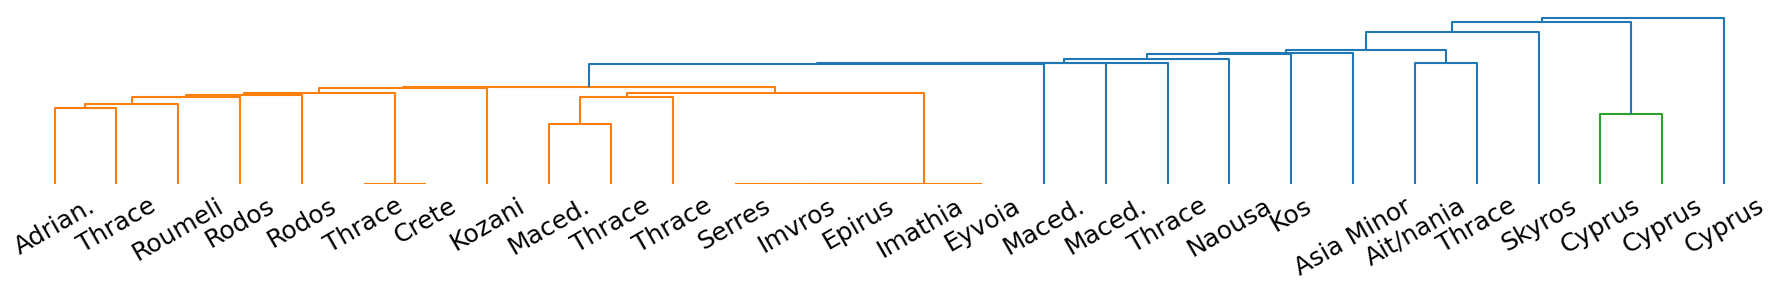

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

vec = TfidfVectorizer(analyzer="char", ngram_range=(2,5), lowercase=True, strip_accents="unicode")
X = vec.fit_transform(crels.text.values)
Z = linkage(X.toarray(), 'single')
fig = plt.figure(figsize=(18, 3))
ax = dendrogram(Z, orientation='top',
                labels=areas,
                distance_sort='descending',
                show_leaf_counts=False,
                show_contracted=True,
                leaf_rotation=30,
                leaf_font_size=18)
sns.despine(left=True, bottom=True)
plt.yticks([])
plt.tight_layout()
fig.savefig('tongue.pdf', format="PDF")

In [ ]:
clustering = fcluster(Z, t=0.4, criterion='distance')
crels.insert(3, "clustering", clustering)
grouped = crels.groupby("clustering")
clusters = pd.DataFrame({"cluster":grouped.area.apply(list), "text":grouped.text.apply(list)})
clusters[clusters.cluster.apply(len)>1]

,cluster,text
clustering,,
5,"[Ίμβρος, Σέρρες, Ήπειρος, Ημαθία, Εύβοια]","[Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ', ..."
6,"[Θράκη, Μακεδονία]","[Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζ',..."
8,"[Κρήτη, Θράκη]","[Η γλώσσα κόκκαλα δεν έχει και κόκκαλα τσακεί,..."


In [ ]:
# focus on clusters with more than one area
for i, row in clusters[clusters.cluster.apply(len)>1].iterrows():
    # hash to avoid duplicated areas (neighbouring proverbs)
    d = dict(list(zip(row.cluster, row.text)))
    if len(d)>1: # ignore duplicates
        # print the clustered versions
        for place in d:
            print(f'{place} --> {d[place]}')
        print()

Ίμβρος --> Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'
Σέρρες --> Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'
Ήπειρος --> Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'
Ημαθία --> Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'
Εύβοια --> Η γλώσσα κόκκαλα δεν έχ' κι κόκκαλα τσακίζ'

Θράκη --> Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζ'
Μακεδονία --> Η γλώσσα κόκκαλα δεν έχ' και κόκκαλα τσακίζει

Κρήτη --> Η γλώσσα κόκκαλα δεν έχει και κόκκαλα τσακεί
Θράκη --> Η γλώσσα κόκκαλα δεν έχει και κόκκαλα τσακεί

